In [1]:
import numpy as np
import matplotlib.pyplot as plt
import marker

1001 [-2.53726263  4.72895949  2.421409  ] 8.76934651572304
1002 [-3.13371574  0.59276457  0.30144492] 8.752052118750445
1003 [0.6679284  1.40471885 1.67271701] 8.632865469342157
1004 [0.35933318 2.73090969 2.82544492] 8.826871181637557
1005 [-2.46606563  0.78470696  0.32172081] 8.8541890007799
1006 [-2.67586367  1.24633333  0.39591292] 8.78828999715958
1007 [0.46821585 2.30975883 2.82188758] 8.83014346466421
1008 [1.04038244 0.91904407 2.65224212] 8.725253031637497
1009 [0.43817789 1.92566377 2.7595042 ] 8.780124958991843
1010 [-1.97127961  2.7236773   2.59215635] 8.70550781783613
1011 [0.8235401  1.78973439 2.6763466 ] 8.854729469513817
1012 [3.45032804 0.30341286 3.46718267] 8.822944988703853
1013 [-2.40966324  0.96019591  6.62620275] 8.860390074453855
1014 [6.77488024 1.63774465 2.5861448 ] 8.738671586840802
1015 [-2.75194738  0.44141419  0.31437398] 8.829005634287077
1016 [3.70784633 1.50737113 0.58472873] 8.782253231747982
1017 [3.86822532 1.66949902 0.92833396] 8.759439631989897

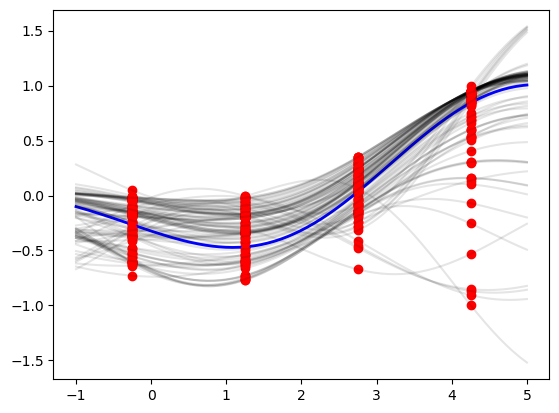

In [3]:
kmax = 0.1
fom_type = 'total'
mk = marker.Marker(kmax=kmax, fom_type=fom_type)

delta_hires = np.linspace(mk.delta_range[0], mk.delta_range[1], 1024)
nodes = []
marks = []
mdirs = []
foms = []
for seed in range(1001, 1101):
    angles = np.loadtxt(f"k0p1_optTotal/seed{seed}_angles.txt")

    n = mk.get_nodes_from_angles(angles)
    mkf = mk.get_mark_from_angles(angles)
    mark = mkf(delta_hires)
    mdir = mk.inspect_mark(mkf)
    fom = mk.get_fom_from_inspection(mdir)

    nodes.append(n)
    marks.append(mark)
    mdirs.append(mdir)
    foms.append(fom)

    sig = -np.sign(n[1])
    plt.plot(mk.delta_nodes, sig*n, 'ro')
    plt.plot(delta_hires, sig*mark, 'k-', alpha=0.1)
    if seed == 1063:
        plt.plot(delta_hires, sig*mark, 'b-', lw=2)
    print(seed, angles, fom)
nodes = np.array(nodes)
marks = np.array(marks)
foms = np.array(foms)

for i, seed in enumerate(range(1001, 1101)):
    np.savez(f"k0p1_optTotal/seed{seed}_data.npz",
             nodes=nodes[i], fom=foms[i],
             pks=mdirs[i]['pks'],
             dpks_Om=mdirs[i]['derivs']['Om'],
             dpks_s8=mdirs[i]['derivs']['s8'],
             cov=mdirs[i]['covar'],
             fish_pk=mdirs[i]['fish_pk'],
             fish_all=mdirs[i]['fish_all'])

1001 [0.46515039 2.39379294 2.32218671 1.40789568] 11.543984192589852
1002 [-2.86685225  0.84350069  0.3657211   1.37730896] 11.543615559259699
1003 [0.30003562 2.25413628 2.66904168 1.50226516] 11.549916533669414
1004 [-0.12779311  2.41086728  2.29191039  1.13279955] 11.481856607739095
1005 [-3.42557463  0.73672369  0.41192657  1.19318052] 11.512972525791438
1006 [3.5467753  0.94076682 0.38470935 1.79270717] 11.542191261182516
1007 [-0.23703605  2.38402906  2.54783638  1.43241306] 11.536003644100198
1008 [3.02892503 0.811737   3.82236023 1.71269218] 11.530426476610549
1009 [0.23026277 2.30910186 2.49084425 1.42750698] 11.54364446633279
1010 [0.18360197 2.43788283 2.32366668 1.52143104] 11.55016744513937
1011 [0.51040066 2.08906259 2.61215813 1.5153924 ] 11.54230142611143
1012 [3.19590397 0.57177712 3.74089702 1.45976339] 11.546972450648722
1013 [-3.02090712  0.79416241  0.63307529  1.63060307] 11.548584992600793
1014 [7.1136975  2.02973167 2.6434767  1.34277213] 11.52335174131733
1015

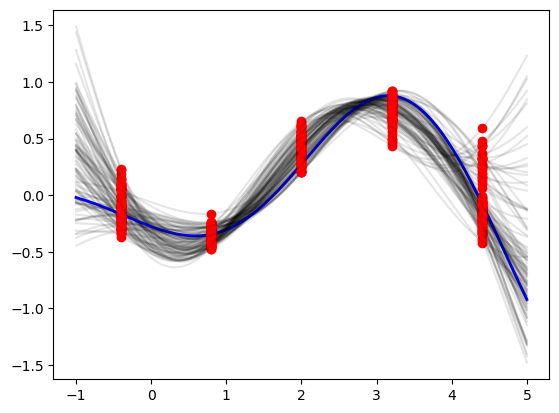

In [2]:
kmax = 0.3
fom_type = 'total'
n_nodes = 5
mk = marker.Marker(kmax=kmax, fom_type=fom_type, n_nodes=n_nodes)

delta_hires = np.linspace(mk.delta_range[0], mk.delta_range[1], 1024)
nodes = []
marks = []
mdirs = []
foms = []
for seed in range(1001, 1101):
    angles = np.loadtxt(f"k0p3_optTotal_nn5/seed{seed}_angles.txt")

    n = mk.get_nodes_from_angles(angles)
    mkf = mk.get_mark_from_angles(angles)
    mark = mkf(delta_hires)
    mdir = mk.inspect_mark(mkf)
    fom = mk.get_fom_from_inspection(mdir)

    nodes.append(n)
    marks.append(mark)
    mdirs.append(mdir)
    foms.append(fom)

    sig = np.sign(n[-2])
    plt.plot(mk.delta_nodes, sig*n, 'ro')
    plt.plot(delta_hires, sig*mark, 'k-', alpha=0.1)
    if seed == 1063:
        plt.plot(delta_hires, sig*mark, 'b-', lw=2)
    print(seed, angles, fom)
nodes = np.array(nodes)
marks = np.array(marks)
foms = np.array(foms)

for i, seed in enumerate(range(1001, 1101)):
    np.savez(f"k0p3_optTotal_nn5/seed{seed}_data.npz",
             nodes=nodes[i], fom=foms[i],
             pks=mdirs[i]['pks'],
             dpks_Om=mdirs[i]['derivs']['Om'],
             dpks_s8=mdirs[i]['derivs']['s8'],
             cov=mdirs[i]['covar'],
             fish_pk=mdirs[i]['fish_pk'],
             fish_all=mdirs[i]['fish_all'])

1001 [-2.427419    3.45409323  1.80712822] 11.632459933492424
1002 [-2.21422388  0.10772363  1.29990448] 11.621361599018039
1003 [1.0715197  2.86228758 1.72905234] 11.629737371973023
1004 [1.33877778 2.96240975 1.52779938] 11.632577312001933
1005 [-1.95366903  0.20853708  1.6330329 ] 11.6383325241799
1006 [-2.06711975  0.06140978  1.34540115] 11.614070682693656
1007 [1.10131773 3.04436319 1.49837387] 11.61504392480313
1008 [3.87184841 0.35088036 1.37462102] 11.628390358560097
1009 [0.6955879  2.72022733 1.85021283] 11.607613370066824
1010 [0.76267635 2.82920022 1.83202569] 11.631792022322223
1011 [0.89967858 3.02990112 1.84348895] 11.622425315353025
1012 [3.70452055 0.19826999 1.31548127] 11.63640564112021
1013 [-2.27618003  0.05050219  1.36473028] 11.615645846968391
1014 [1.11011403 3.09917103 1.76875102] 11.611654624754037
1015 [-1.76649581  0.21194281  1.50991526] 11.634330699643082
1016 [3.63443812 0.20540526 1.33532827] 11.637298139269111
1017 [2.40285315 3.19382038 1.64156552] 11

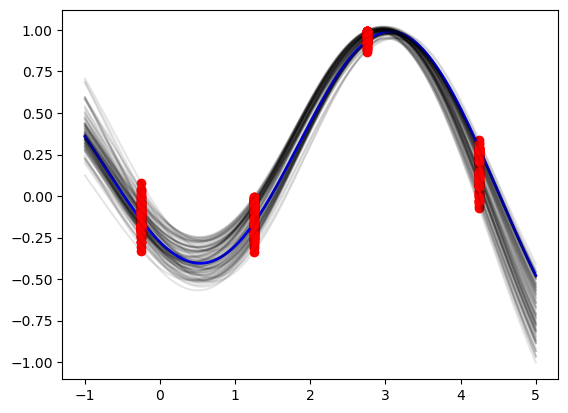

In [2]:
kmax = 0.3
fom_type = 'total'
mk = marker.Marker(kmax=kmax, fom_type=fom_type)

delta_hires = np.linspace(mk.delta_range[0], mk.delta_range[1], 1024)
nodes = []
marks = []
mdirs = []
foms = []
for seed in range(1001, 1101):
    angles = np.loadtxt(f"k0p3_optTotal/seed{seed}_angles.txt")

    n = mk.get_nodes_from_angles(*angles)
    mkf = mk.get_mark_from_angles(*angles)
    mark = mkf(delta_hires)
    mdir = mk.inspect_mark(mkf)
    fom = mk.get_fom_from_inspection(mdir)

    nodes.append(n)
    marks.append(mark)
    mdirs.append(mdir)
    foms.append(fom)

    sig = np.sign(n[-2])
    plt.plot(mk.delta_nodes, sig*n, 'ro')
    plt.plot(delta_hires, sig*mark, 'k-', alpha=0.1)
    if seed == 1063:
        plt.plot(delta_hires, sig*mark, 'b-', lw=2)
    print(seed, angles, fom)
nodes = np.array(nodes)
marks = np.array(marks)
foms = np.array(foms)

for i, seed in enumerate(range(1001, 1101)):
    np.savez(f"k0p3_optTotal/seed{seed}_data.npz",
             nodes=nodes[i], fom=foms[i],
             pks=mdirs[i]['pks'],
             dpks_Om=mdirs[i]['derivs']['Om'],
             dpks_s8=mdirs[i]['derivs']['s8'],
             cov=mdirs[i]['covar'],
             fish_pk=mdirs[i]['fish_pk'],
             fish_all=mdirs[i]['fish_all'])

1001 [-2.34607729  3.22104105  1.80839227] 6.240018307163025
1002 [-2.21770248  0.10371991  1.30342066] 6.239237175942036
1003 [2.30188894 3.15045192 1.67719802] 6.23032987177024
1004 [1.12392187 3.04461649 1.51008355] 6.23235585214186
1005 [-2.94892248  0.25530127  1.60175013] 6.241792538293223
1006 [-2.18717601  0.06063479  1.34879604] 6.235527366366743
1007 [0.96711634 3.02423663 1.85216193] 6.2387119578502075
1008 [3.84355706 0.3457217  1.38941227] 6.243309127325301
1009 [0.93871025 2.92100158 1.64765954] 6.245613737986203
1010 [0.75443601 2.82975199 1.82849876] 6.246552395772941
1011 [0.943922   3.02704984 1.84851386] 6.239271954616818
1012 [3.6528059  0.179666   1.32279227] 6.253567317025418
1013 [-2.26311035  0.04713985  1.36910823] 6.235231576827575
1014 [-5.30524895  3.09917185  1.76742466] 6.233577774372686
1015 [-2.37743859  0.36419944  1.36786274] 6.240829103045396
1016 [3.6359792  0.20120975 1.33300342] 6.254346801332279
1017 [0.80552813 2.86694911 1.86901993] 6.2467479440

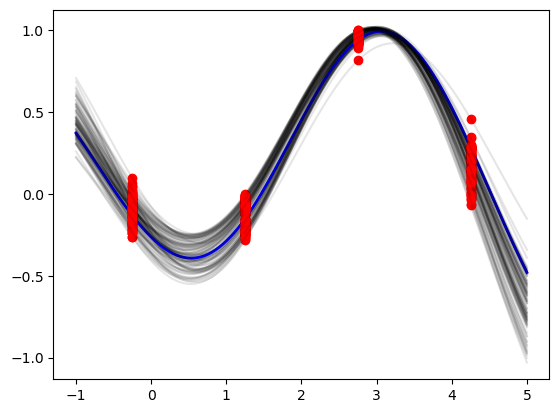

In [3]:
kmax = 0.3
fom_type = 'Om'
mk = marker.Marker(kmax=kmax, fom_type=fom_type)

delta_hires = np.linspace(mk.delta_range[0], mk.delta_range[1], 1024)
nodes = []
marks = []
mdirs = []
foms = []
for seed in range(1001, 1101):
    angles = np.loadtxt(f"k0p3_optOm/seed{seed}_angles.txt")

    n = mk.get_nodes_from_angles(*angles)
    mkf = mk.get_mark_from_angles(*angles)
    mark = mkf(delta_hires)
    mdir = mk.inspect_mark(mkf)
    fom = mk.get_fom_from_inspection(mdir)

    nodes.append(n)
    marks.append(mark)
    mdirs.append(mdir)
    foms.append(fom)

    sig = np.sign(n[-2])
    plt.plot(mk.delta_nodes, sig*n, 'ro')
    plt.plot(delta_hires, sig*mark, 'k-', alpha=0.1)
    if seed == 1063:
        plt.plot(delta_hires, sig*mark, 'b-', lw=2)
    print(seed, angles, fom)
nodes = np.array(nodes)
marks = np.array(marks)
foms = np.array(foms)

for i, seed in enumerate(range(1001, 1101)):
    np.savez(f"k0p3_optOm/seed{seed}_data.npz",
             nodes=nodes[i], fom=foms[i],
             pks=mdirs[i]['pks'],
             dpks_Om=mdirs[i]['derivs']['Om'],
             dpks_s8=mdirs[i]['derivs']['s8'],
             cov=mdirs[i]['covar'],
             fish_pk=mdirs[i]['fish_pk'],
             fish_all=mdirs[i]['fish_all'])

1001 [-2.1278459   3.23519513  1.83258018] 6.466548074667839
1002 [-2.24515417  0.10764035  1.30163038] 6.469327141522684
1003 [0.975156   2.91706225 1.66979018] 6.484725365654432
1004 [1.3401288  2.96500765 1.51209578] 6.4921401698253804
1005 [-1.95850645  0.20954386  1.63924935] 6.496991913394945
1006 [-1.90797165  0.27743531  1.48751774] 6.497197896389169
1007 [1.32150888 2.9613936  1.52114225] 6.493174902329354
1008 [3.36944888 0.19099469 1.39850951] 6.4790257529442945
1009 [1.04099866 2.94175751 1.68800295] 6.4833477601853415
1010 [0.43771666 2.93801473 1.7924618 ] 6.479534604991993
1011 [1.36673454 2.96269139 1.54164619] 6.492185640796729
1012 [ 3.66516643  0.17649773 -1.82173833] 6.478619229243747
1013 [-2.09172577  0.04902811  1.36320385] 6.463812029617361
1014 [1.27483469 2.92729116 1.76044653] 6.474598970879968
1015 [-1.91595783  0.32928495  1.46822132] 6.49437234878098
1016 [3.78390572 0.23313601 1.30664797] 6.47807342254753
1017 [0.81550942 2.97473766 1.8677787 ] 6.47355681

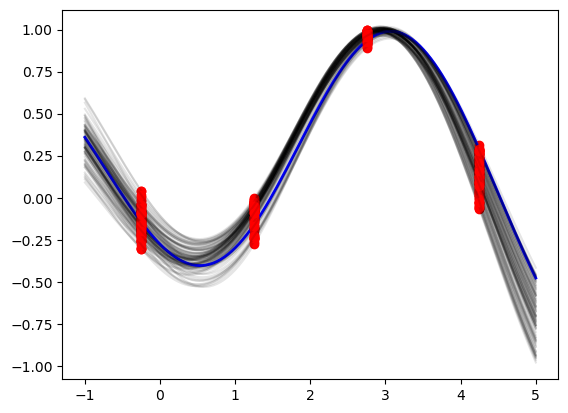

In [4]:
kmax = 0.3
fom_type = 's8'
mk = marker.Marker(kmax=kmax, fom_type=fom_type)

delta_hires = np.linspace(mk.delta_range[0], mk.delta_range[1], 1024)
nodes = []
marks = []
mdirs = []
foms = []
for seed in range(1001, 1101):
    angles = np.loadtxt(f"k0p3_opts8/seed{seed}_angles.txt")

    n = mk.get_nodes_from_angles(*angles)
    mkf = mk.get_mark_from_angles(*angles)
    mark = mkf(delta_hires)
    mdir = mk.inspect_mark(mkf)
    fom = mk.get_fom_from_inspection(mdir)

    nodes.append(n)
    marks.append(mark)
    mdirs.append(mdir)
    foms.append(fom)

    sig = np.sign(n[-2])
    plt.plot(mk.delta_nodes, sig*n, 'ro')
    plt.plot(delta_hires, sig*mark, 'k-', alpha=0.1)
    if seed == 1063:
        plt.plot(delta_hires, sig*mark, 'b-', lw=2)
    print(seed, angles, fom)
nodes = np.array(nodes)
marks = np.array(marks)
foms = np.array(foms)

for i, seed in enumerate(range(1001, 1101)):
    np.savez(f"k0p3_opts8/seed{seed}_data.npz",
             nodes=nodes[i], fom=foms[i],
             pks=mdirs[i]['pks'],
             dpks_Om=mdirs[i]['derivs']['Om'],
             dpks_s8=mdirs[i]['derivs']['s8'],
             cov=mdirs[i]['covar'],
             fish_pk=mdirs[i]['fish_pk'],
             fish_all=mdirs[i]['fish_all'])